**To import the dataset from kaggle**

In [4]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/artyomkolas/3-kinds-of-pneumonia")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yahyahamza
Your Kaggle Key: ··········


100%|██████████| 3.49G/3.49G [02:08<00:00, 29.1MB/s]


**Import necesseary libraries to make the project**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import glob as gb
import cv2
from tensorflow import keras
import plotly.express as px
import scipy as sp
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import array_to_img
import random

**Data directories**

In [6]:
data = '/content/3-kinds-of-pneumonia/Curated X-Ray Dataset'
COVID = '/content/3-kinds-of-pneumonia/Curated X-Ray Dataset/COVID-19'
Normal = '/content/3-kinds-of-pneumonia/Curated X-Ray Dataset/Normal'
Bacterial = '/content/3-kinds-of-pneumonia/Curated X-Ray Dataset/Pneumonia-Bacterial'
Viral = '/content/3-kinds-of-pneumonia/Curated X-Ray Dataset/Pneumonia-Viral'

**Check size of images**

In [7]:
size = []
files = gb.glob(pathname= str( COVID + '/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()#how many images have the same shape

(1024, 1024, 3)    132
(2000, 2000, 3)     86
(300, 400, 3)       45
(1200, 1200, 3)     33
(480, 480, 3)       22
                  ... 
(765, 754, 3)        1
(1024, 1020, 3)      1
(739, 643, 3)        1
(869, 1024, 3)       1
(2413, 2341, 3)      1
Length: 866, dtype: int64

In [8]:
size = []
files = gb.glob(pathname= str( Normal + '/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()#how many images have the same shape

(1024, 1024, 3)    1288
(300, 400, 3)       624
(1171, 1472, 3)       2
(924, 1268, 3)        2
(1066, 1422, 3)       2
                   ... 
(1229, 1574, 3)       1
(751, 1292, 3)        1
(1179, 1612, 3)       1
(1249, 1728, 3)       1
(1349, 1696, 3)       1
Length: 1348, dtype: int64

In [9]:
size = []
files = gb.glob(pathname= str( Bacterial + '/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()#how many images have the same shape

(300, 400, 3)      498
(760, 1064, 3)       5
(592, 992, 3)        5
(672, 976, 3)        5
(648, 1072, 3)       5
                  ... 
(928, 1072, 3)       1
(2104, 2056, 3)      1
(640, 928, 3)        1
(1130, 1566, 3)      1
(1106, 1562, 3)      1
Length: 2073, dtype: int64

In [10]:
size = []
files = gb.glob(pathname= str( Viral + '/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()#how many images have the same shape

(300, 400, 3)      304
(680, 1136, 3)       3
(736, 1128, 3)       3
(1056, 1336, 3)      3
(656, 984, 3)        3
                  ... 
(1080, 1352, 3)      1
(1523, 1746, 3)      1
(944, 1368, 3)       1
(528, 1024, 3)       1
(1195, 1686, 3)      1
Length: 1255, dtype: int64

**Show sample of the data in ditecories**

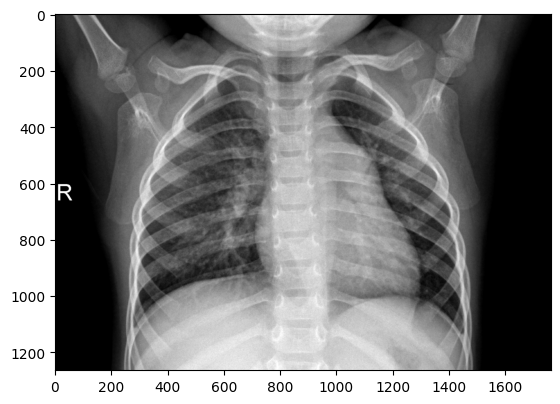

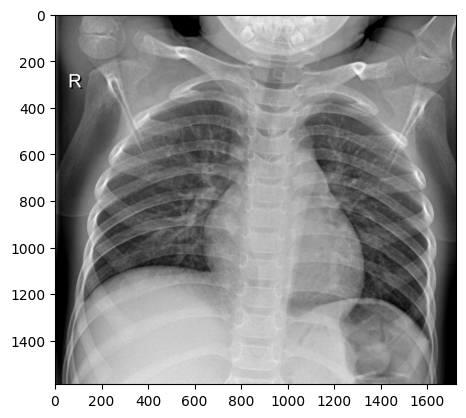

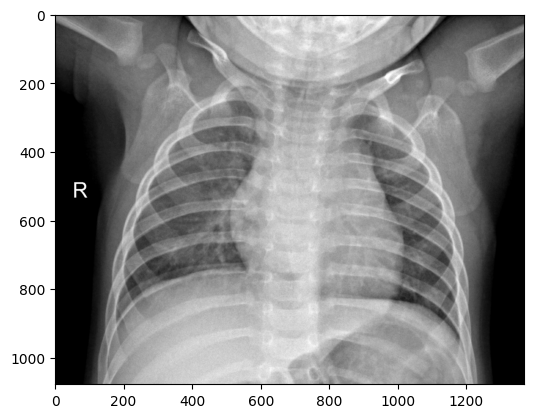

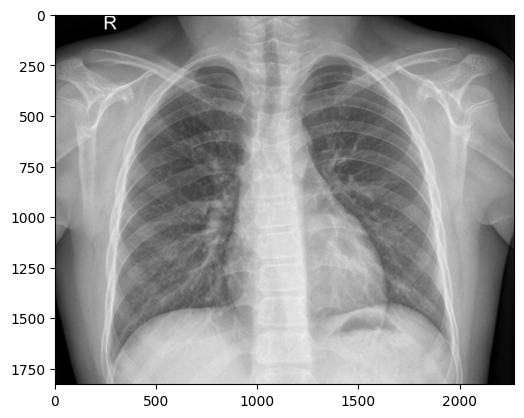

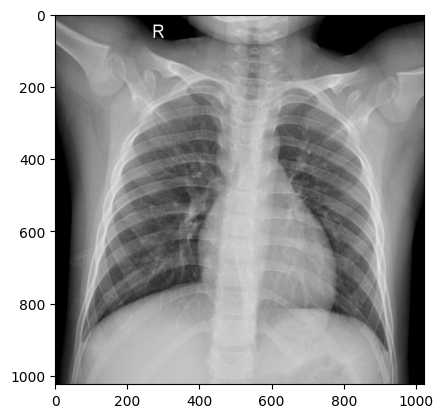

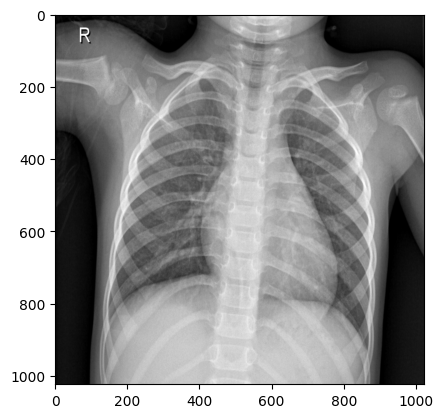

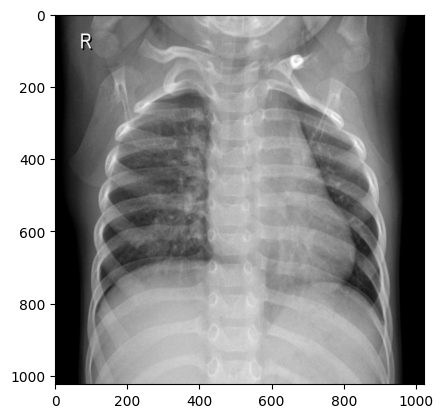

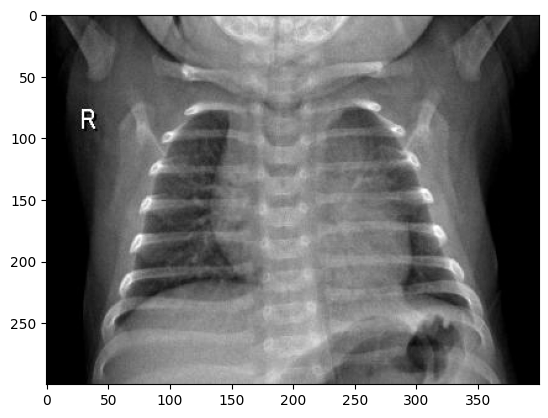

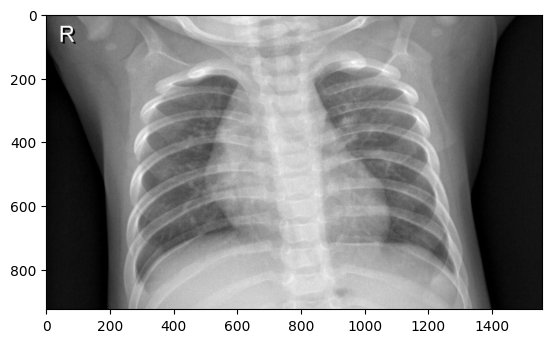

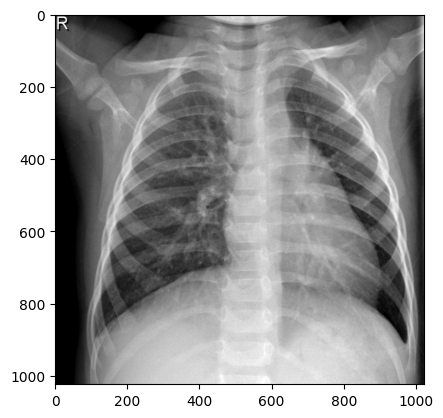

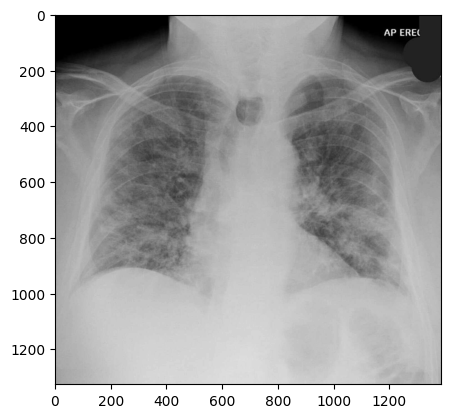

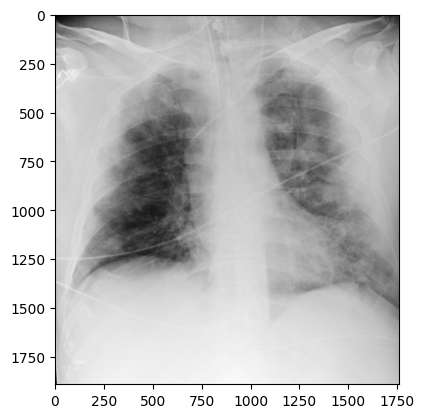

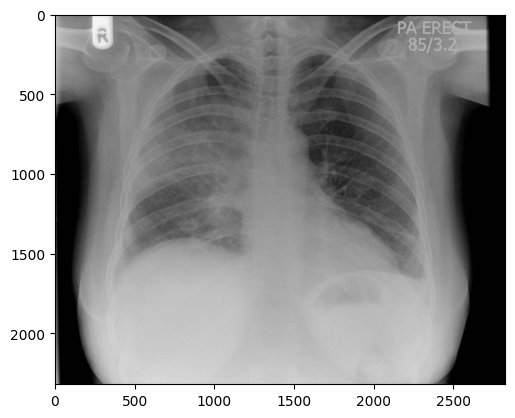

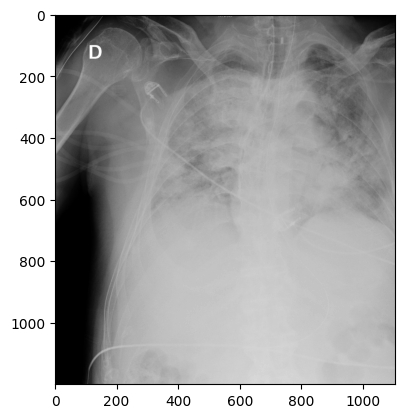

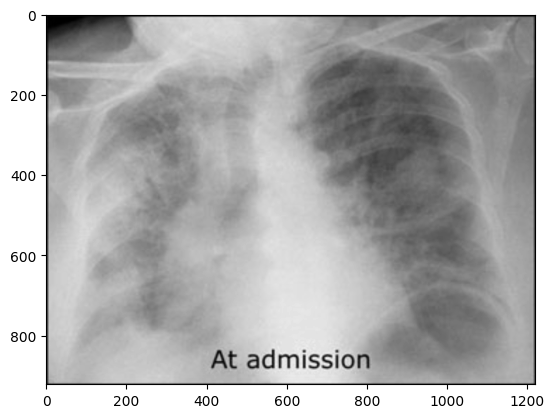

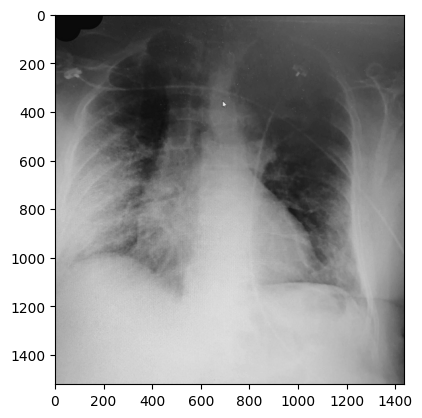

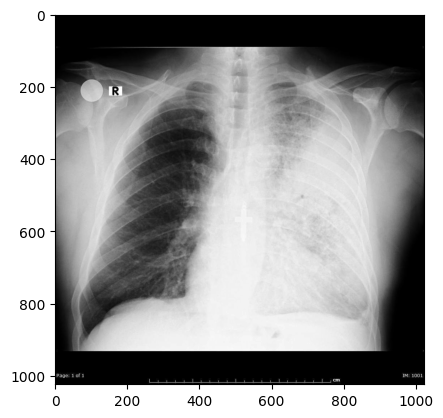

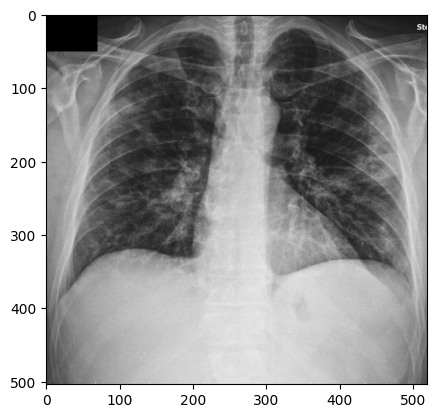

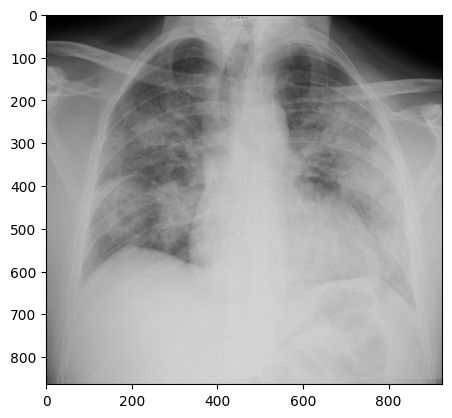

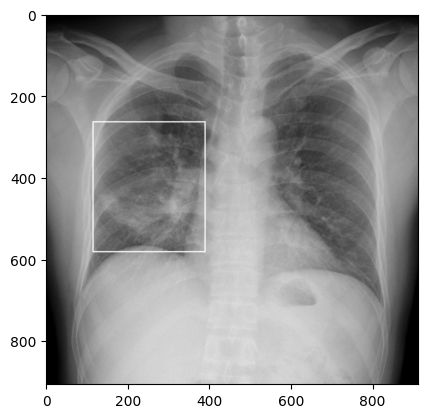

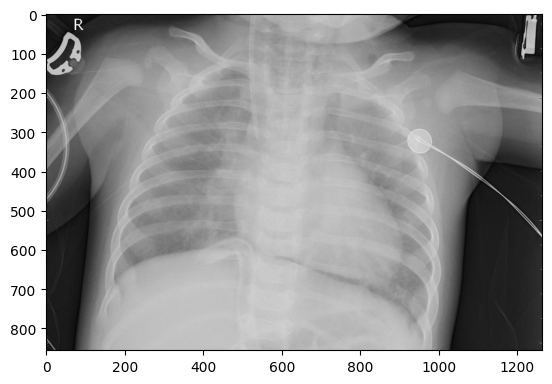

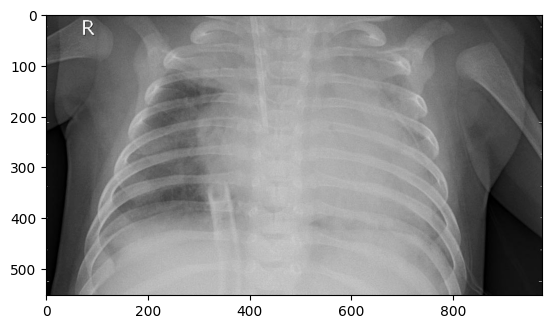

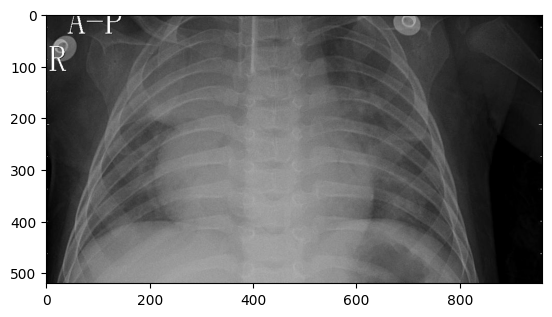

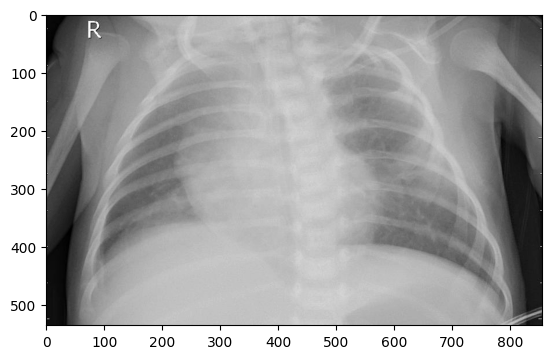

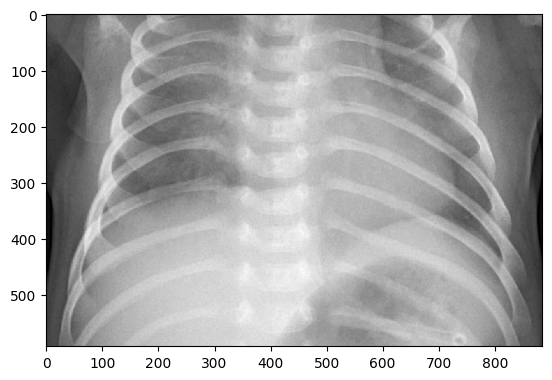

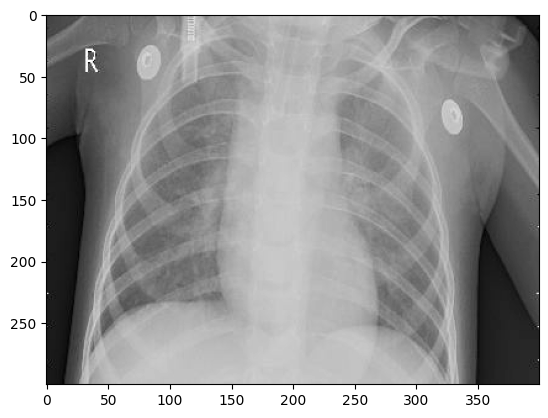

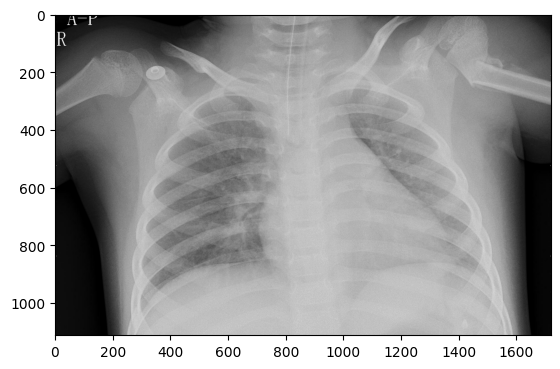

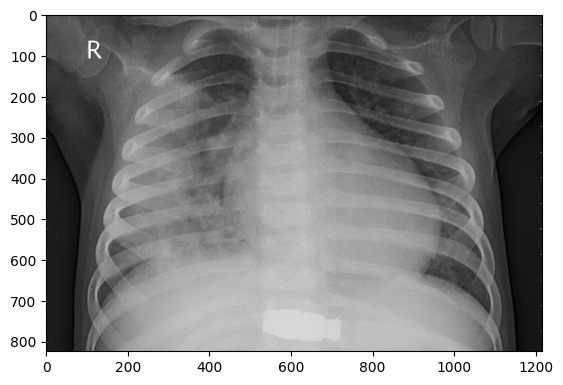

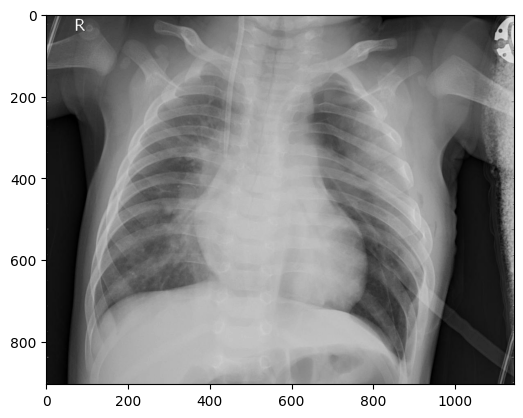

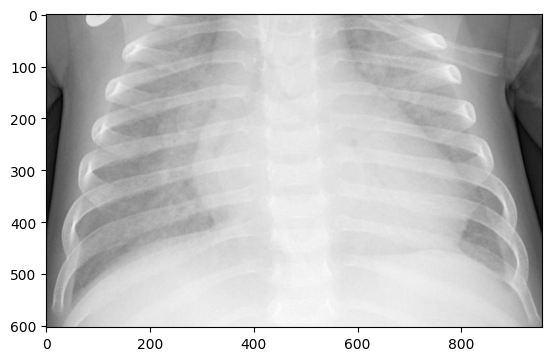

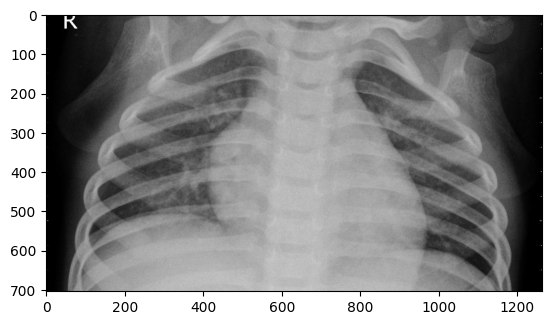

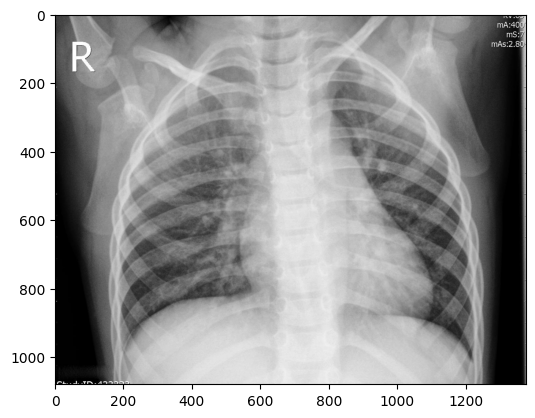

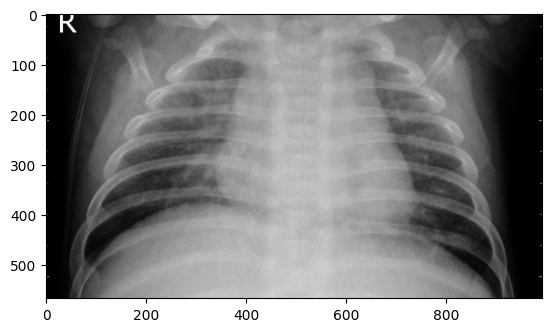

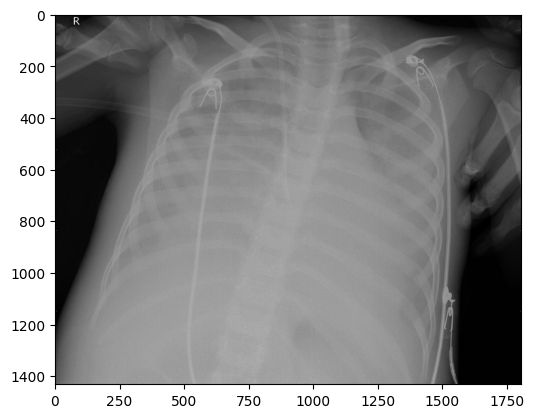

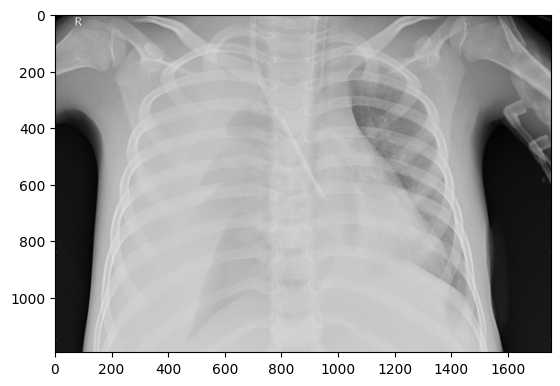

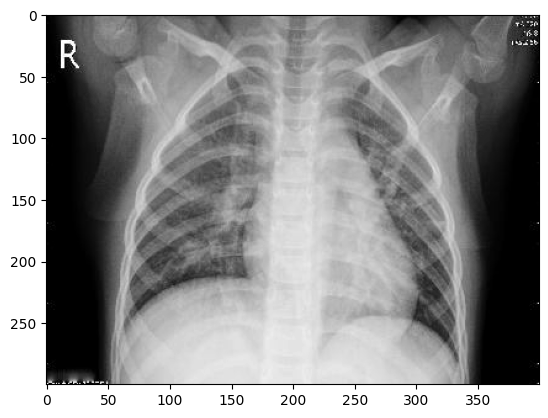

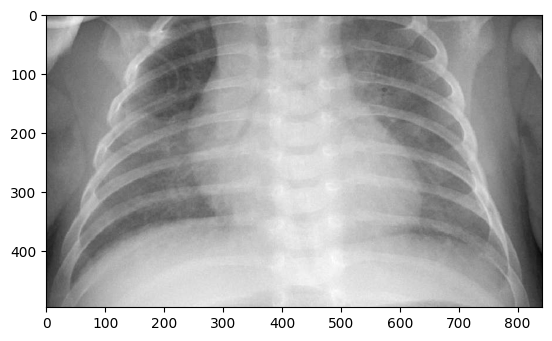

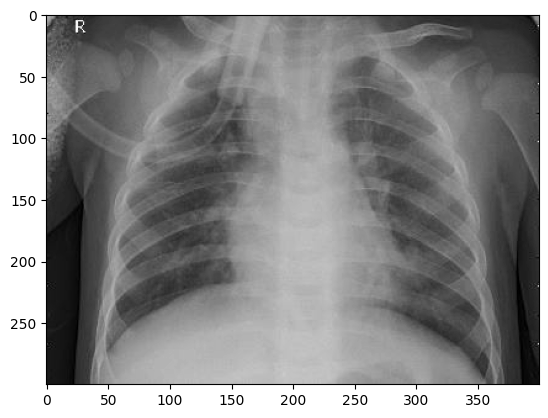

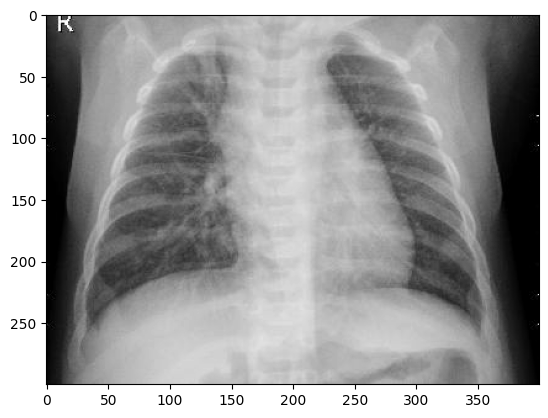

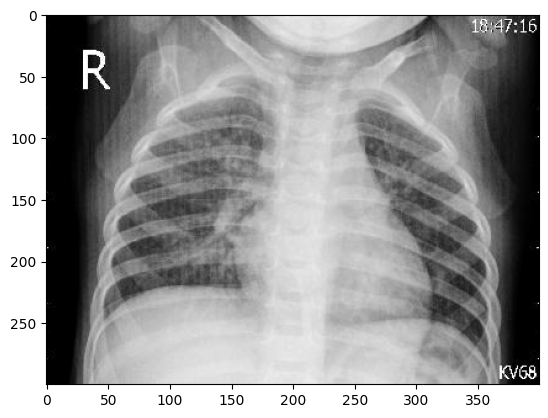

In [11]:
DATADIR = data
CATEGORIES=[Normal,COVID, Bacterial,Viral]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    x=0
    for img in os.listdir (path): # iterate over each image per Normal,COVID, Bacterial,Viral
        x+=1

        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray')
        plt.show() # display

        if x==10 :
            break



In [12]:
print( img_array)
print( img_array.shape)

[[ 0  0  0 ... 11 21 16]
 [ 0  0  0 ... 32 23  0]
 [ 0  0  0 ...  3 24 32]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  1  2  2]
 [ 0  0  0 ...  2  2  2]]
(300, 400)


**Unify the image size**

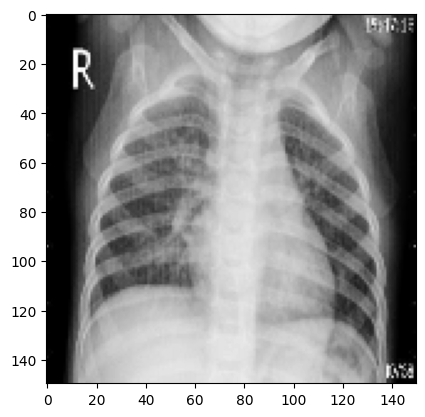

In [13]:
### make images(input) the same size
img_size = 150
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array, cmap='gray')
plt.show() # display

In [14]:
new_array.shape

(150, 150)

In [15]:
#resize photes 150*150
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num= CATEGORIES.index (category) 
        for img in tqdm (os.listdir (path)):
             try:
                    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) 
                    new_array = cv2.resize(img_array, (img_size, img_size)) 
                    training_data.append( [new_array, class_num])
             except Exception as e:
                pass
                    
create_training_data()

100%|██████████| 1656/1656 [00:13<00:00, 122.45it/s]


In [16]:
print(training_data[0])

[array([[42, 46, 53, ...,  0,  0,  0],
       [41, 45, 47, ...,  0,  0,  0],
       [36, 43, 49, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0]


In [17]:
print(training_data[3000:3500])

[[array([[54, 62, 81, ...,  0,  0,  0],
       [49, 65, 79, ...,  0,  0,  0],
       [50, 64, 80, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0], [array([[  0,   0,   0, ..., 124, 139,  78],
       [  0,   0,   0, ..., 128, 139,  81],
       [  0,   0,   0, ..., 135, 122,  77],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 0], [array([[6, 5, 7, ..., 6, 5, 7],
       [5, 4, 5, ..., 5, 6, 5],
       [5, 4, 7, ..., 6, 7, 7],
       ...,
       [5, 5, 5, ..., 9, 8, 8],
       [6, 4, 5, ..., 9, 6, 8],
       [4, 6, 5, ..., 7, 6, 8]], dtype=uint8), 0], [array([[ 1,  0,  1, ..., 86, 66, 61],
       [ 2,  0,  3, ..., 93, 65, 43],
       [ 3,  0,  5, ..., 81, 61, 58],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 

**Separate labels and inputs**

In [18]:
x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.array(x).reshape(-1,img_size,img_size, 1)#(number of photos,100,100)
y=np.array(y)

In [19]:
x.shape , x[1].shape, 

((9208, 150, 150, 1), (150, 150, 1))

In [20]:
y.shape , y[1].shape,

((9208,), ())

**Data visualization**

In [21]:
dic = {
    0 : 'Normal',
    1 : 'COVID-19',
    2 : 'Pneumonia-Bacterial',
    3 : 'Pneumonia-Viral',
}
def getDiseaseName(code):
    for x,y in dic.items():
        if code==x:
            return y

In [22]:
# To divede data to train and test and shuffle the
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [23]:
print(f'X_train shape  is {x_train.shape}')
print(f'X_test shape  is {x_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (7826, 150, 150, 1)
X_test shape  is (1382, 150, 150, 1)
y_train shape  is (7826,)
y_test shape  is (1382,)


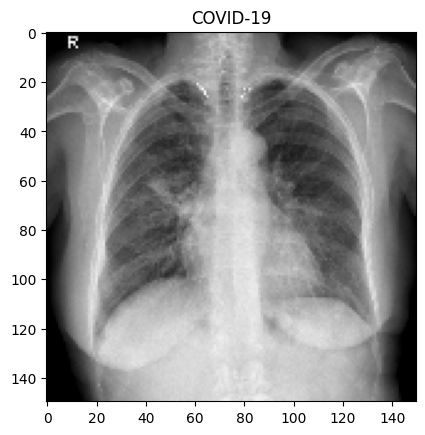

In [24]:
def showImage(index):
    plt.imshow(x_train[index], cmap='gray')
    plt.title(getDiseaseName(y_train[index]))
    plt.show()
showImage(100)

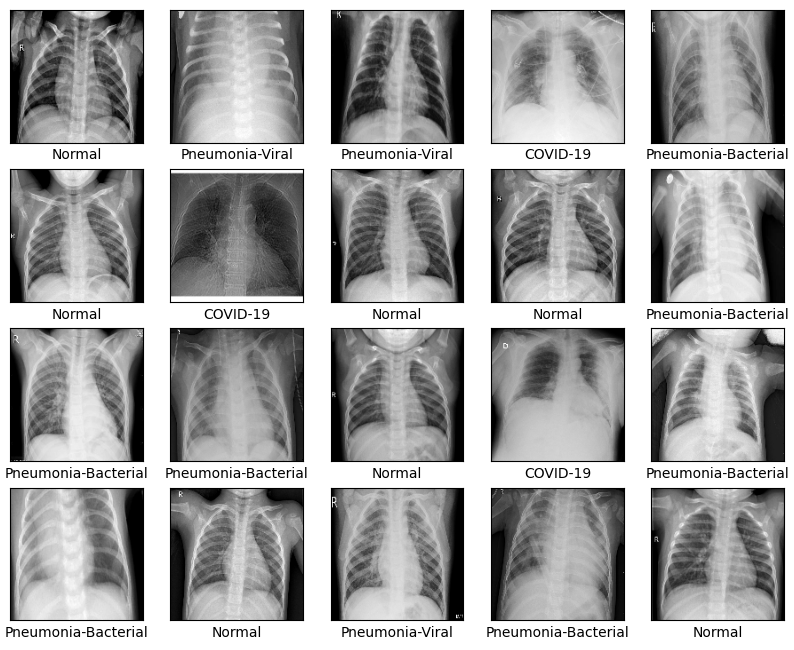

In [25]:
plt.figure(figsize=(10,10))
for i in range(20):
    index=random.randint(0,7826)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(getDiseaseName(y_train[index]))
plt.show()

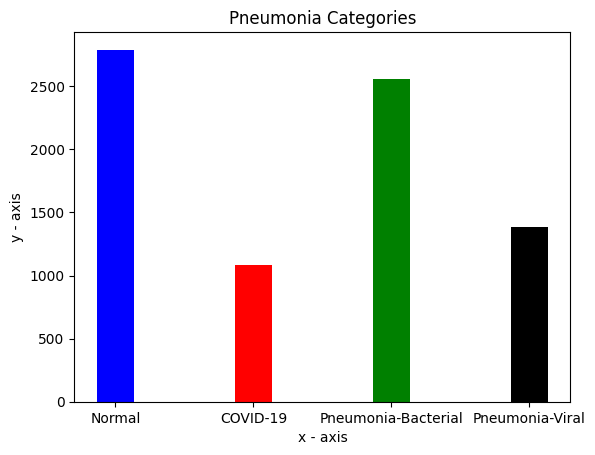

In [26]:
# x-coordinates of left sides of bars 
left = [1, 4, 7, 10]
  
# heights of bars
height = [list(y_train).count(0), list(y_train).count(1), list(y_train).count(2), list(y_train).count(3)]
  
# labels for bars
tick_label = ['Normal',
             'COVID-19',
    'Pneumonia-Bacterial',
    'Pneumonia-Viral']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue','red', 'green','black'])
  
# naming the x-axis
plt.xlabel('x - axis')
# naming the y-axis
plt.ylabel('y - axis')
# plot title
plt.title('Pneumonia Categories')
  
# function to show the plot
plt.show()

**Prepare data for the model**

In [27]:
# data normalization
x_train = x_train / 255    #[0:255]
x_test = x_test / 255      #[0:255]

In [28]:
x_train , x_test

(array([[[[0.        ],
          [0.99607843],
          [0.        ],
          ...,
          [0.04313725],
          [0.02745098],
          [0.01568627]],
 
         [[0.        ],
          [0.99607843],
          [0.        ],
          ...,
          [0.04313725],
          [0.02745098],
          [0.01568627]],
 
         [[0.        ],
          [0.96078431],
          [0.        ],
          ...,
          [0.03921569],
          [0.02745098],
          [0.01176471]],
 
         ...,
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]],
 
         [[0.        ],
          [0.        ],
          [0.        ],
          ...,
          [0.        ],
          [0.        ],
          [0.        ]]],
 
 
        [

**Making the model using keras**

In [85]:
model = keras.models.Sequential([
        keras.layers.Conv2D(180,kernel_size=(3,3),activation='relu',input_shape=(img_size, img_size, 1)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(256,activation='relu') ,  
        keras.layers.Dropout(rate=0.3) ,  
        keras.layers.Dense(128,activation='relu') ,           
        keras.layers.Dropout(rate=0.4) ,            
        keras.layers.Dense(4,activation='softmax') ,    
        ])
model.compile(optimizer ='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 180)     1800      
                                                                 
 conv2d_17 (Conv2D)          (None, 146, 146, 150)     243150    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 150)      0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 120)       162120    
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 80)        86480     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 80)         0         
 2D)                                                  

In [87]:
training_history = model.fit(x_train, y_train, epochs=20, batch_size=64, verbose=1)

Epoch 1/20
123/123 [==============================] - 53s 407ms/step - loss: 0.8551 - accuracy: 0.6269
Epoch 2/20
123/123 [==============================] - 50s 405ms/step - loss: 0.4936 - accuracy: 0.7987
Epoch 3/20
123/123 [==============================] - 50s 406ms/step - loss: 0.4290 - accuracy: 0.8232
Epoch 4/20
123/123 [==============================] - 50s 404ms/step - loss: 0.3831 - accuracy: 0.8354
Epoch 5/20
123/123 [==============================] - 50s 405ms/step - loss: 0.3536 - accuracy: 0.8481
Epoch 6/20
123/123 [==============================] - 50s 404ms/step - loss: 0.3365 - accuracy: 0.8539
Epoch 7/20
123/123 [==============================] - 50s 403ms/step - loss: 0.3101 - accuracy: 0.8660
Epoch 8/20
123/123 [==============================] - 50s 403ms/step - loss: 0.2985 - accuracy: 0.8734
Epoch 9/20
123/123 [==============================] - 50s 403ms/step - loss: 0.2823 - accuracy: 0.8785
Epoch 10/20
123/123 [==============================] - 50s 404ms/step - l

In [88]:
ModelLoss, ModelAccuracy = model.evaluate(x_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

44/44 [==============================] - 3s 59ms/step - loss: 0.4454 - accuracy: 0.8806
Test Loss is 0.4453897774219513
Test Accuracy is 0.8806078433990479


In [89]:
model.save('PneumoniaClassifocation2.h5')

**Prediction**

In [99]:
y_pred = model.predict(x_test)

print('Prediction Shape is {}'.format(y_pred.shape))

44/44 [==============================] - 3s 55ms/step
Prediction Shape is (1382, 4)


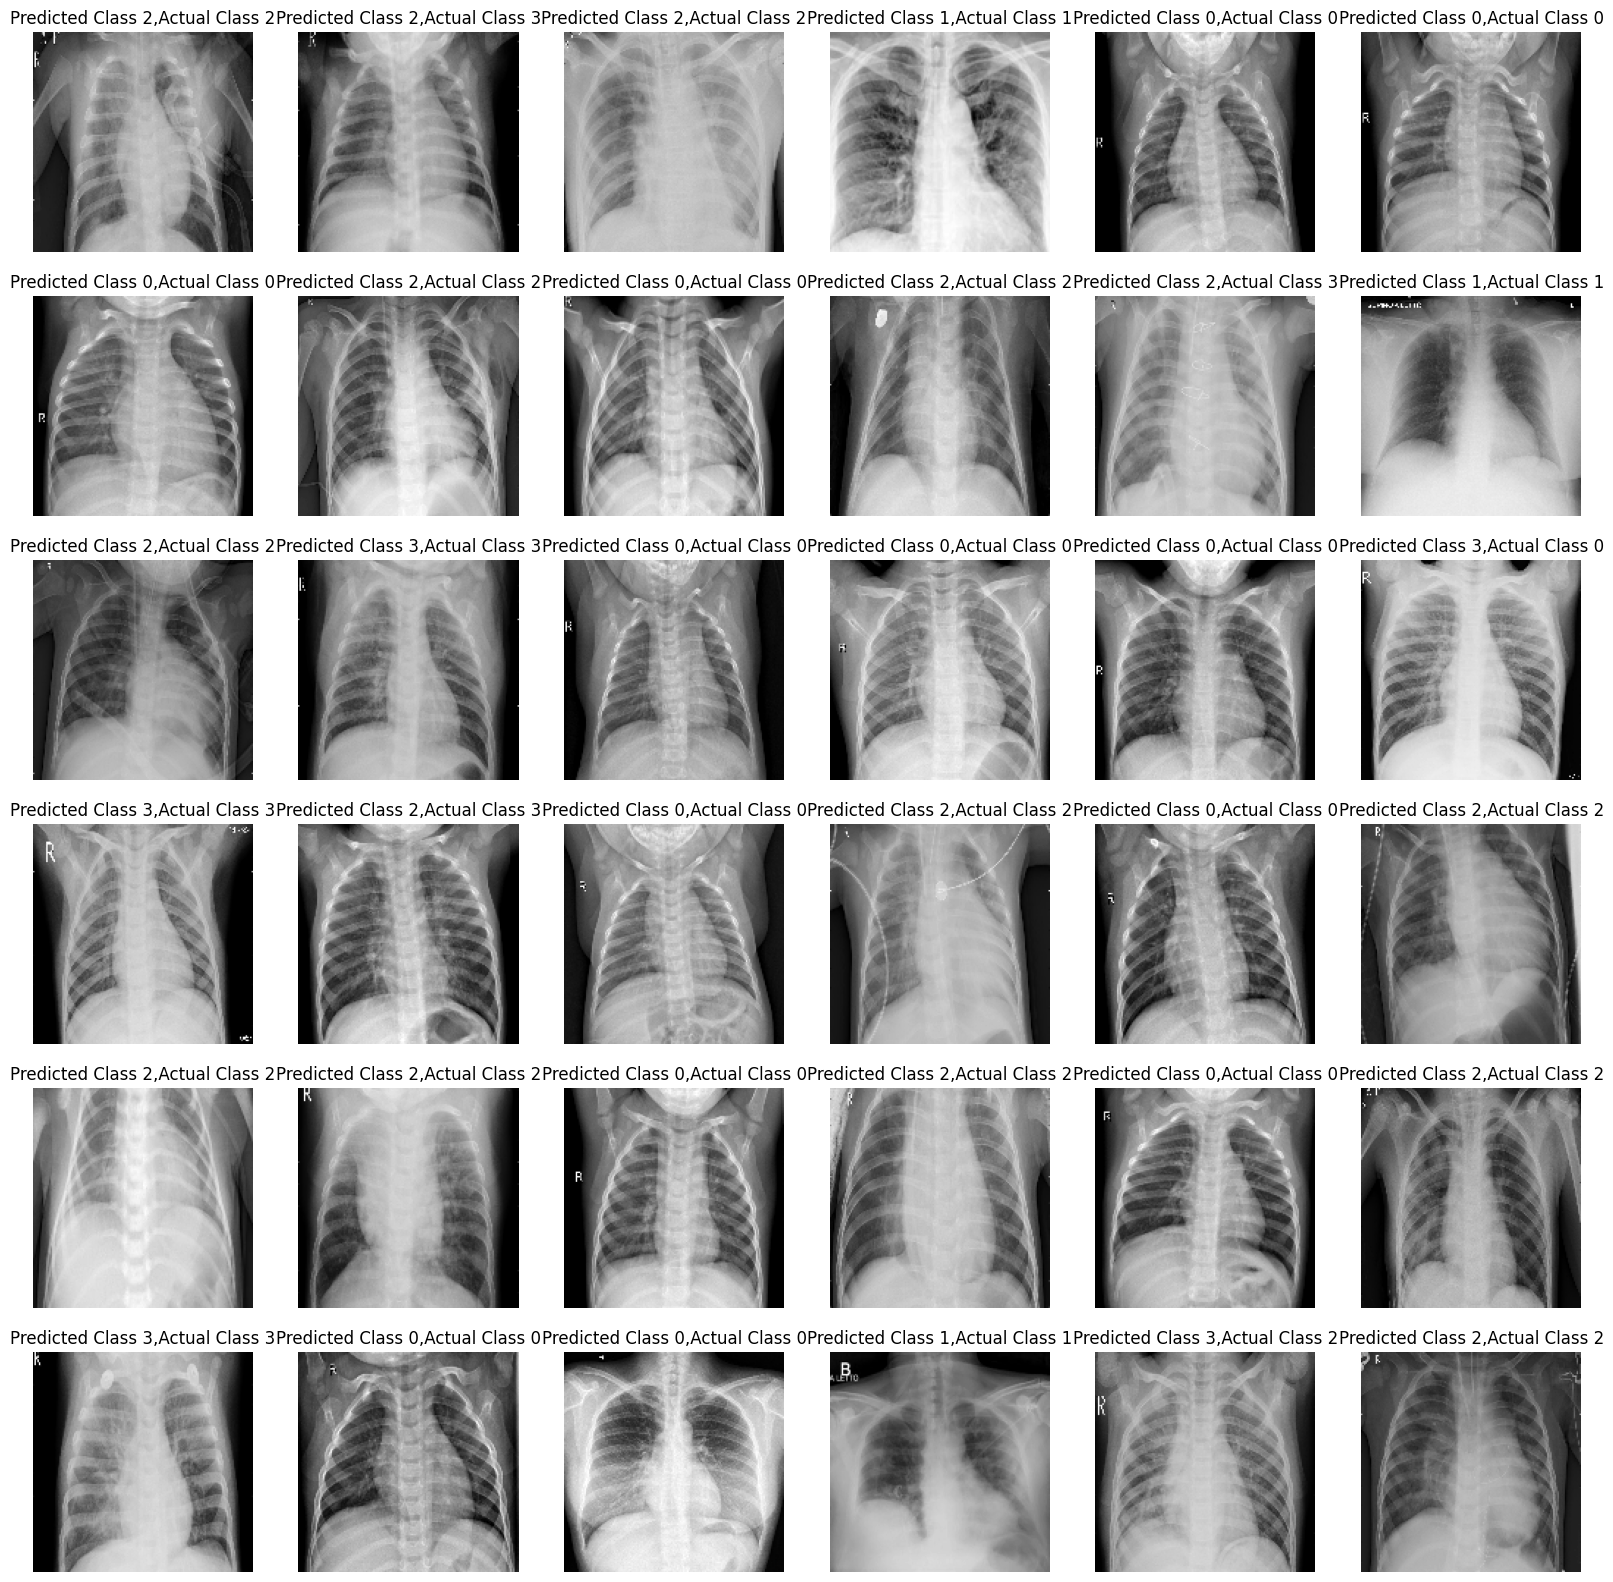

In [105]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i], cmap='gray')    
    plt.axis('off')
    #plt.title("Predicted: "+getDiseaseName(np.argmax(y_pred[i]))+" Actual: ")
    plt.title("Predicted Class {},Actual Class {}".format(np.argmax(y_pred[i]), y_test[i]))

In [ ]:
plt.plot(training_history.training_history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()